In [3]:
# Import the standard libraries for processing
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Load the dataset using pandas read function
df=pd.read_csv("C:/Users/rupal/OneDrive/Desktop/practice_work/Python/healthcare_dataset.csv")

In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [6]:
df.shape

(10000, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [8]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
for col in df.columns:
    print(col, df[col].nunique())    

Name 9378
Age 68
Gender 2
Blood Type 8
Medical Condition 6
Date of Admission 1815
Doctor 9416
Hospital 8639
Insurance Provider 5
Billing Amount 10000
Room Number 400
Admission Type 3
Discharge Date 1834
Medication 5
Test Results 3


In [10]:
# Duplicate values check
checking_duplicate_values=df.duplicated().sum()
print(f'The dataset contains {checking_duplicate_values} duplicate values')

The dataset contains 0 duplicate values


In [11]:
df.describe().style.background_gradient(cmap='RdYlBu')

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


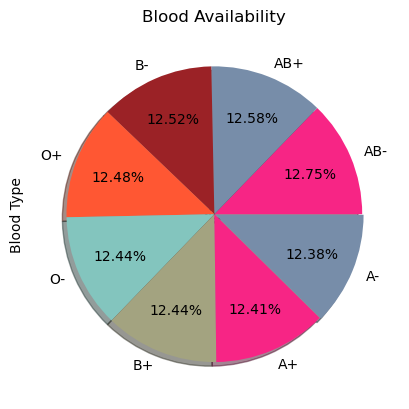

In [12]:
df['Blood Type'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',title='Blood Availability',
      explode=[0,0,0,0,0,0,0,0.01],   #Explode: Explode one slice for emphasis. he slice corresponding to the 'A-' blood typeis slightly separated from the rest. 
       labels=['AB-','AB+','B-','O+','O-','B+','A+','A-'],   # Set labels for each slice
      colors=['#f72585', '#778da9', '#9b2226', '#ff5733', '#83c5be', '#a3a380'],        # Set custom colors
     autopct='%1.2f%%', pctdistance=0.7,  # autopct: Display percentage values with two decimal places
     shadow=True)                         # pctdistance: Set the distance of percentage labels from the center
plt.show()

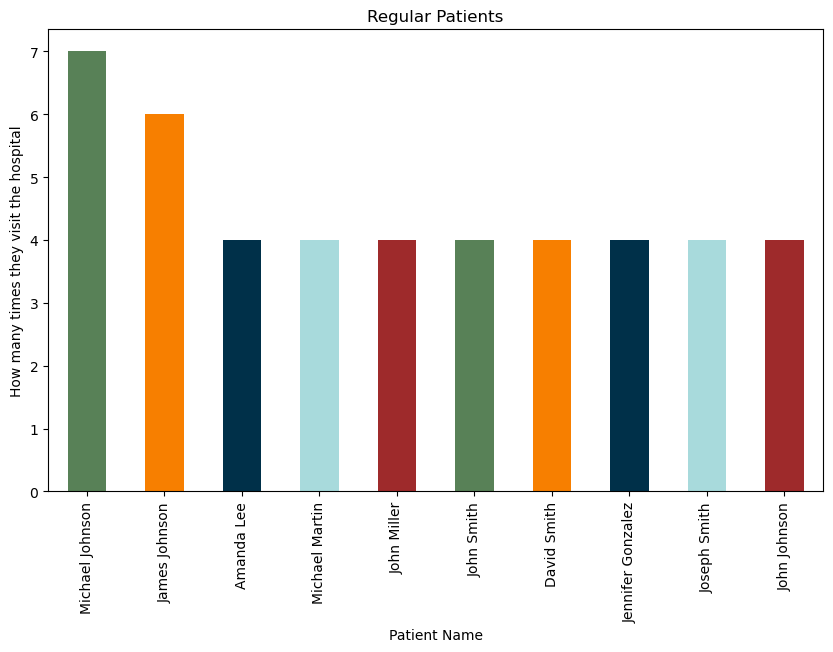

In [13]:
# Checking the regular customers
df['Name'].value_counts().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title='Regular Patients',
    figsize=(10,6),
    color=['#588157', '#f77f00', '#003049', '#a8dadc', '#9e2a2b']) 
plt.xlabel('Patient Name')
plt.ylabel('How many times they visit the hospital')
plt.show()


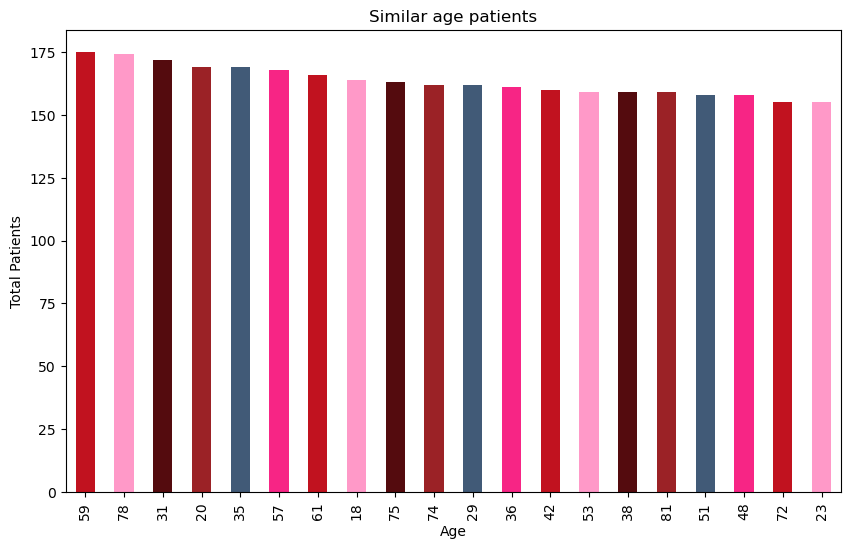

In [14]:
# Checking similar age patients
colors_code = ['#c1121f', '#ff99c8', '#540b0e', '#9b2226', '#415a77', '#f72585']
df['Age'].value_counts().sort_values(ascending=False).head(20).plot(
    kind='bar',
    figsize=(10, 6), 
    color=colors_code,
    title='Similar age patients'
)
plt.xlabel('Age')
plt.ylabel('Total Patients')
plt.show()


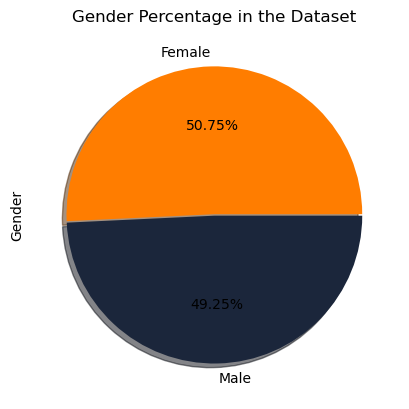

In [15]:
# Find the gender percentage in the dataset
df['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',title='Gender Percentage in the Dataset',
     explode=[0,0.01],
     labels=['Female','Male'],
     colors=['#ff7d00','#1b263b'],
     autopct='%1.2f%%',
     shadow=True)
plt.show()

* AB- is the leading blood group in the dataset, followed by AB+.

* Michel Janson and James Janson are the top patients, each having visited by the hospital 6 times.

* Patient aged 59 and 79 tend to be the most frequent visitors to the hospital.

* The female patient dominates in the dataset.

In [17]:
df.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive


In [18]:
df.groupby(['Medical Condition', 'Medication']).size().unstack().style.background_gradient(cmap='GnBu_r')

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Medical Condition,,,,,
Arthritis,322,320,318,324,366
Asthma,370,340,346,310,342
Cancer,291,352,350,346,364
Diabetes,335,301,326,327,334
Hypertension,328,335,356,323,346
Obesity,322,328,319,332,327


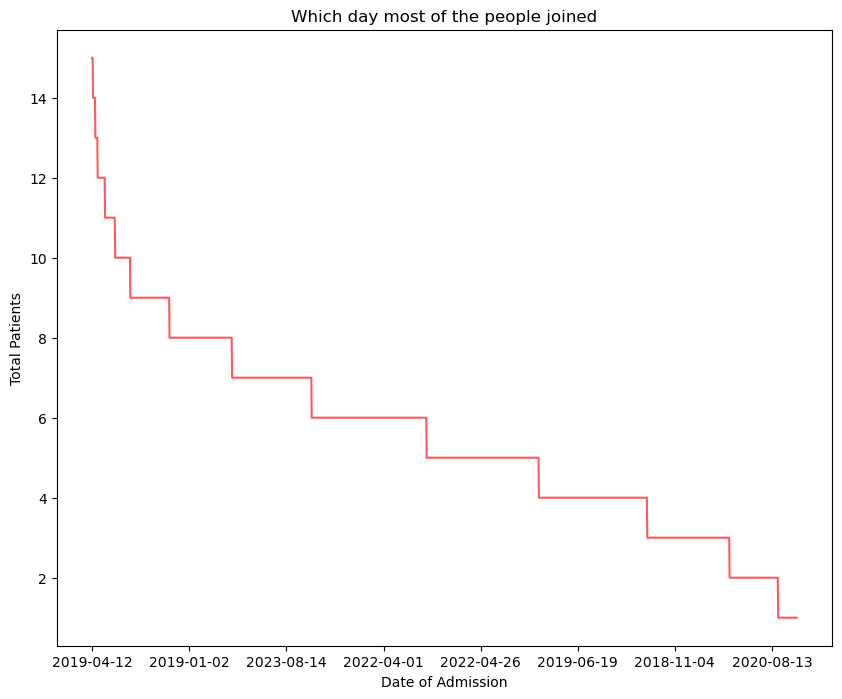

In [19]:
# Joining date of most of the patients
df['Date of Admission'].value_counts().sort_values(ascending=False).plot(kind='line',figsize=(10,8),color=['#ff595e'],title='Which day most of the people joined')
plt.xlabel('Date of Admission')
plt.ylabel('Total Patients')
plt.show()

In [27]:
df.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive


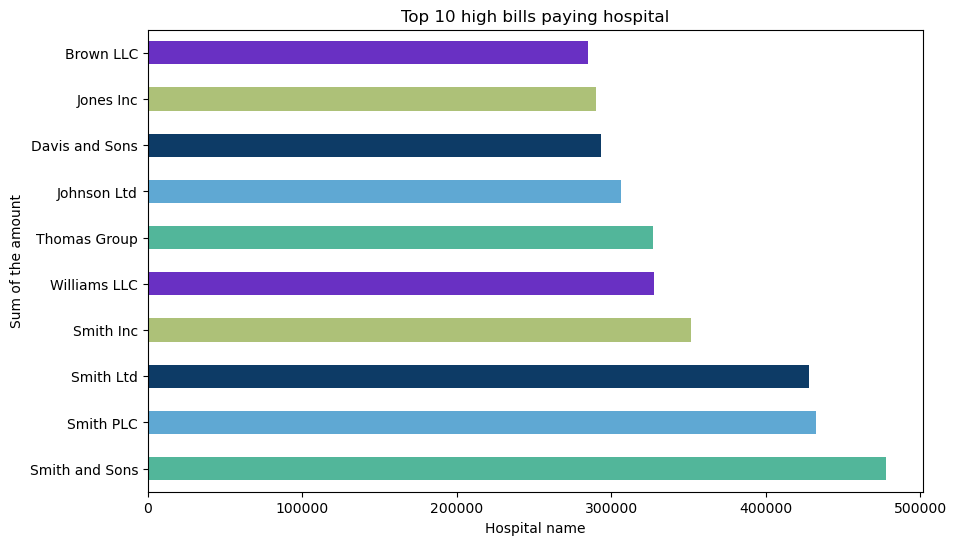

In [26]:
# Top 10 high fees colleting hosptial
df.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)\
.plot(kind='barh',figsize=(10,6),color=['#52b69a','#5fa8d3','#0d3b66','#adc178','#6930c3'])
plt.title("Top 10 high bills paying hospital")
plt.xlabel("Hospital name")
plt.ylabel("Sum of the amount")
plt.show()

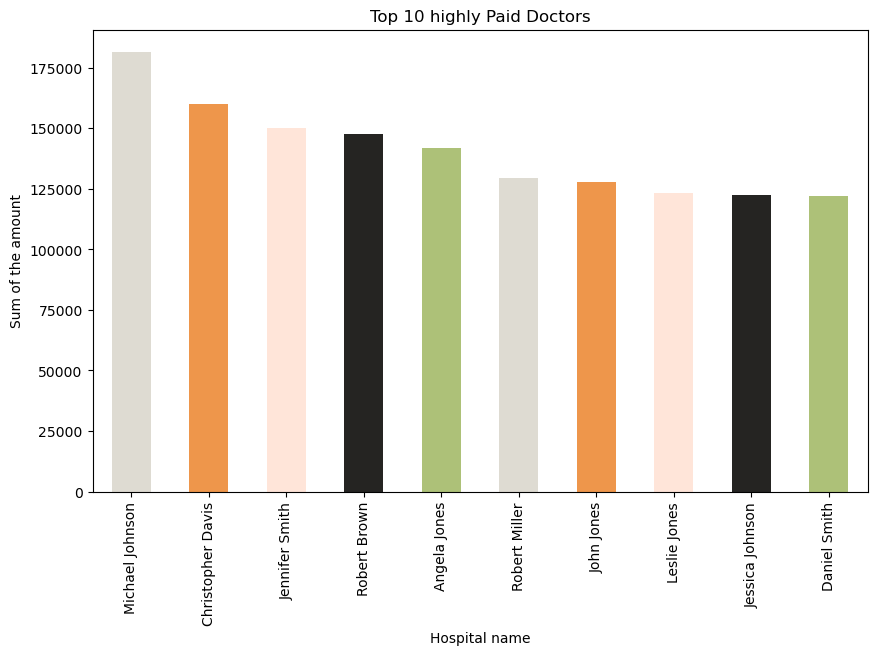

In [31]:
# Highly paid doctors
df.groupby('Doctor')['Billing Amount'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,6),color=['#dedbd2','#ee964b','#ffe5d9','#252422','#adc178'])
plt.title("Top 10 highly Paid Doctors")
plt.xlabel("Hospital name")
plt.ylabel("Sum of the amount")
plt.show()

In [36]:
# Admission type with different medical condition
df.groupby('Medical Condition')['Admission Type'].value_counts().unstack().style.background_gradient(cmap='seismic_r')

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


* For arthritis conditions, Penicillin medication is used, while for asthma, aspirin is prescribed.

*On April 12, 2019, most patients joined hospitals.

*Smith and Sons charge high amounts for their patients.

*Michel Janson is the highest-earning doctor in the dataset.

In [39]:
# Gender wise average billing amount
df.groupby('Gender')['Billing Amount'].mean().round(2).sort_values(ascending=False)

Gender
Male      25550.22
Female    25484.39
Name: Billing Amount, dtype: float64

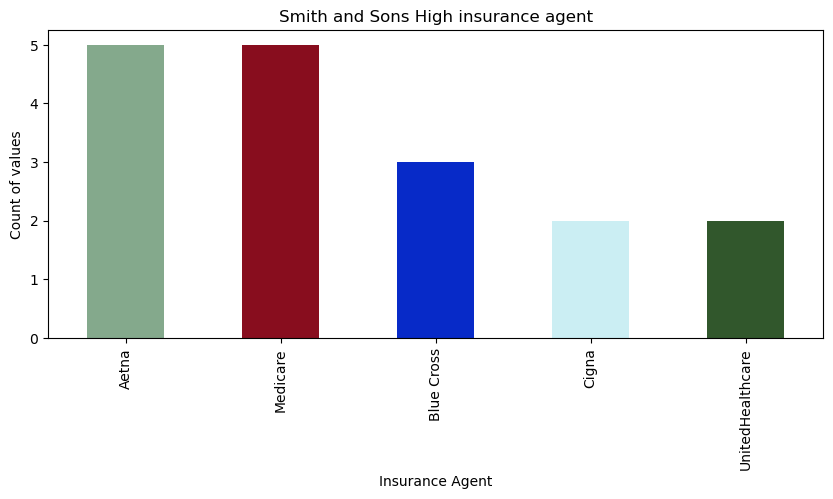

In [70]:
# Dr.smith and Dr.sons hospital insuarance providers 
df.groupby('Hospital')['Insurance Provider'].value_counts().loc['Smith and Sons']\
.plot(kind='bar',title="Smith and Sons High insurance agent",figsize=(10,4),color=['#84a98c','#880d1e','#072ac8','#cbeef3','#31572c'])
plt.xlabel("Insurance Agent")
plt.ylabel("Count of values")
plt.show()

<Axes: title={'center': 'Insurance providers for diabetes'}, ylabel='Insurance Provider'>

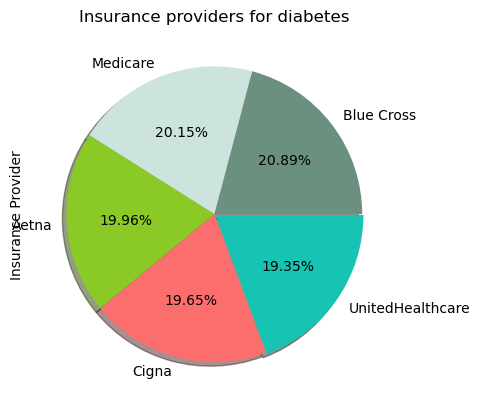

In [85]:
# Insurance for diabetes
diabetes=df['Medical Condition']=='Diabetes'
df.loc[diabetes]['Insurance Provider'].value_counts()\
.plot(kind='pie', title='Insurance providers for diabetes', 
     explode=[0,0,0,0,0.01],labels=['Blue Cross','Medicare','Aetna','Cigna','UnitedHealthcare'],
      colors=['#6b9080','#cce3de','#8ac926','#fc6e6e','#17c3b2'], autopct='%1.2f%%',
     shadow=True)


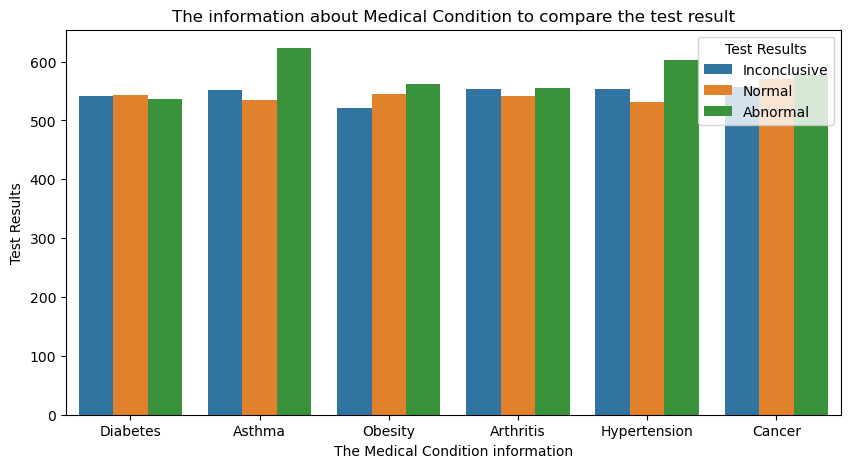

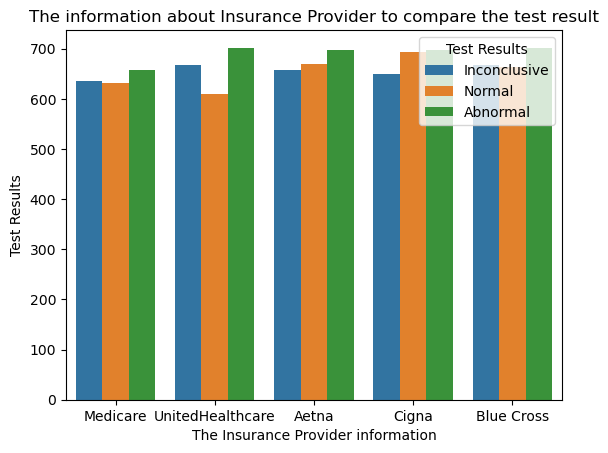

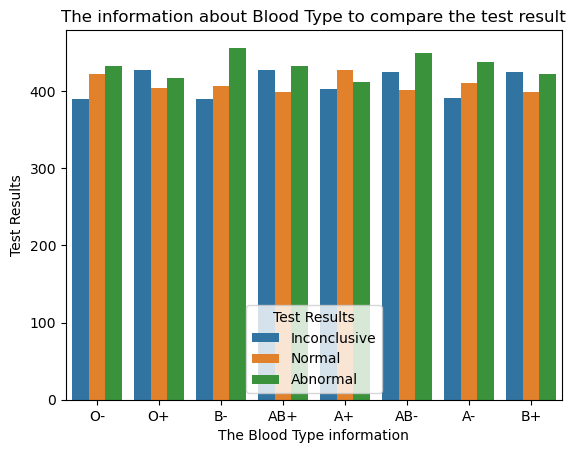

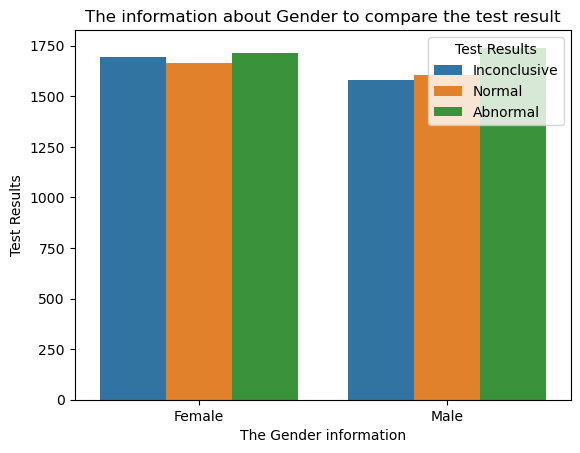

In [99]:
plt.figure(figsize=(10,5))
for i in ['Medical Condition','Insurance Provider','Blood Type','Gender']:
    sns.countplot(data=df,x=i,hue='Test Results',palette='tab10')
    plt.title(f'The information about {i} to compare the test result')
    plt.xlabel(f'The {i} information')
    plt.ylabel('Test Results')
    plt.show()

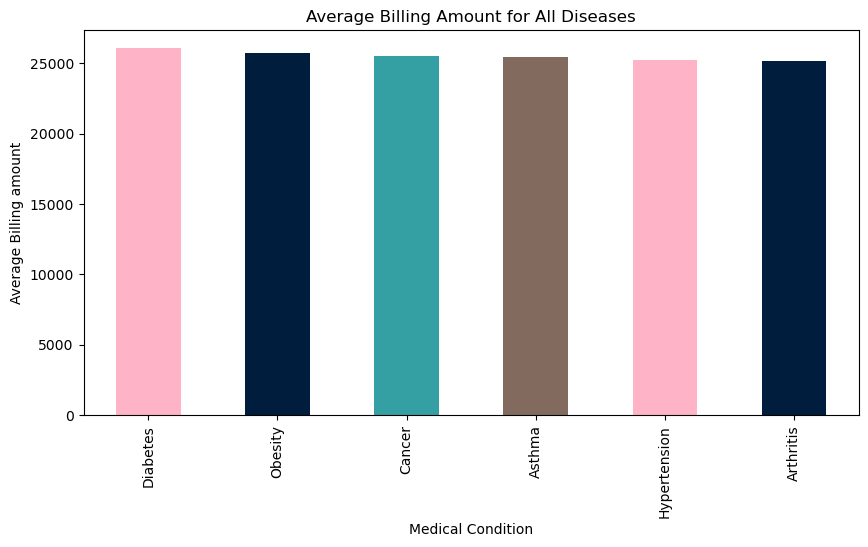

In [102]:
# Average billing amount for each diseases
df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5),
                    color=['#ffb3c6','#001d3d','#34a0a4','#826a5e'],title='Average Billing Amount for All Diseases')
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing amount")
plt.show()